Part 6 of Project 2

Ahmadreza Eslaminia

Ae15


used the following sources for code:

https://www.kaggle.com/code/yasufuminakama/g2net-efficientnet-b7-baseline-training

In [ ]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'g2net-gravitational-wave-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F23249%2F2399555%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T063126Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D60c1d404077d19b497e6b79e77315fef239a6db5d77935a46deca68fe6de22ded816f595ee25e7c5906ddd08d0cf2518c7d1a7327cef033b80320319d549cd631c7130e3eab8697c08d72495db79b5e393d2b72457d19d9302b92fb7edde89dcf8228933c0de34dcc86a2dcc9958e786c1d5589e2cf82d7916b0320854183a74d035056b8f1225d1cef324241f45831e727907f13a00ec1381e432f959b996e0bffef4d46db170691c0adfcd03a30f516c7c0ebf9851c850e047793f7b3075e2529e82eef4487afa43564e5249eb797000f8b2c660df055f05a3bf72f4eeac92724eaf8d8a4423bf29dcdf6eeb01a46942a2a82fa7b13fd4b88aa23fd81fc3a7,g2net-n-mels-128-test-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1442546%2F2386402%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T063126Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2f6515a0a5757e733545bb1679c50643cf04f812eb432e7db53f8bc0c12ab4bf87cf8ed1ecfcffad5d14417f42e80a20024d16b63b1e704237e5bdaa31787f40148a57c1fe987f3ddef6d20abeec570e0807d7caff705c974e3ae01cad59cd580c0f8f29c8713749514bf06f9635d9a577fbcf2f9e525a3d638c2f734d11594ff2ade79c6f0262268f83c65c9c09a621b81f1aeed89738bee0d8a83b702d55ca28c89968e7ae3e871d2ed49881441eb7a00e01230fdc0e6902390e1311d5edf8373e027e668849290588d768e78d6522131e58e8c28534e91afd33833385db6d750c1f24f3e55a5bc1829568fadcfc76e70bbefd303bffe477d94e141229d007,g2net-n-mels-128-train-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1442642%2F2386550%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T063126Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c313e368e7ddf82238b02b7c23dd95e3662ab6741caa2ac305d9afa0af6414d4eb6b83f591c1daea9b8a516b59c4cbfaf8caf12b36beff7c5c37c0a6371f0c1ccc4150105d75a5f7a15f5d85c105c62fdab2a87493988df6631cd9c94956aa3be704449bc340eb78252ebfb02f74300e934ee873c6ab85112728f8a31fe4e8209405dd52305e4a53148e7e8d395ab51fb02ab4b72102add360c1663e0f101656961ff1d480d46610cab724bd29ed3ead0c807a258781559debe8ce5d9557dbac569b3371d405fb075b17ebcf7c3d21363c065bf4345e6328ed7206897469860e6ce590347a75e5bfb5f601f108b00a09923be5896ddd317e2dd6000aa1f4077,pytorch-image-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F686792%2F2660070%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T063126Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D24c0fd701fd1b093bf4c84d5bad7395cfbe69b09866605da730bbcbd20ccaa8cb60cbbd79c6c43ab0f79eec56bb44aa9963f9eec4fb9d4264cd6159da9b0f31a00fed311f0998f91c933a8c05f685fb09ecae9f67a13e9a8976e6bb811e0ea87a072374a47c88e9ef935442cd67b5441cd2e12ff5d87a76da65c0d4d7714cb2332e95ab1b91ad6e3e9fef6759c663f4319eeae273671bdc9799f51e684a7442a5bed49bc80bef4df6ec852010c2d8dce8ec9887531b96fce41787eb21162dd976ee612cff8b807bf91c3f46547de40a1aea2943f2ac415eb708c750a9dfaf5f47f29bc9b461dc56d03cf3c76ab6cff8d8deea953543ec0077b10f90a8246826b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 74086993965 bytes downloaded
Downloaded and uncompressed: g2net-gravitational-wave-detection
[==================================================] 2843573025 bytes downloaded
Downloaded and uncompressed: g2net-n-mels-128-test-images
[==================================================] 7047765812 bytes downloaded
Downloaded and uncompressed: g2net-n-mels-128-train-images
[==================================================] 14892787 bytes downloaded
Downloaded and uncompressed: pytorch-image-models
Data source import complete.


In [ ]:
!pip install -q nnAudio
!pip install -q --upgrade wandb
!pip install -q grad-cam
!pip install -q ttach


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
!pip install wandb

# Data Loading

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('../input/g2net-gravitational-wave-detection/training_labels.csv')
test = pd.read_csv('../input/g2net-gravitational-wave-detection/sample_submission.csv')

def get_train_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/train/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

def get_test_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/test/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

train['file_path'] = train['id'].apply(get_train_file_path)
test['file_path'] = test['id'].apply(get_test_file_path)

display(train.head())
display(test.head())

,id,target,file_path
0,00000e74ad,1,../input/g2net-gravitational-wave-detection/tr...
1,00001f4945,0,../input/g2net-gravitational-wave-detection/tr...
2,0000661522,0,../input/g2net-gravitational-wave-detection/tr...
3,00007a006a,0,../input/g2net-gravitational-wave-detection/tr...
4,0000a38978,1,../input/g2net-gravitational-wave-detection/tr...


,id,target,file_path
0,00005bced6,0.5,../input/g2net-gravitational-wave-detection/te...
1,0000806717,0.5,../input/g2net-gravitational-wave-detection/te...
2,0000ef4fe1,0.5,../input/g2net-gravitational-wave-detection/te...
3,00020de251,0.5,../input/g2net-gravitational-wave-detection/te...
4,00024887b5,0.5,../input/g2net-gravitational-wave-detection/te...


# Quick EDA

/usr/local/lib/python3.10/dist-packages/nnAudio/Spectrogram.py:4: Warning: importing Spectrogram subpackage will be deprecated soon. You should import the feature extractor from the feature subpackage. See actual documentation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nnAudio/utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)


CQT kernels created, time used = 0.0613 seconds


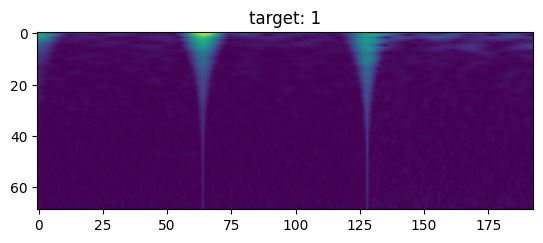

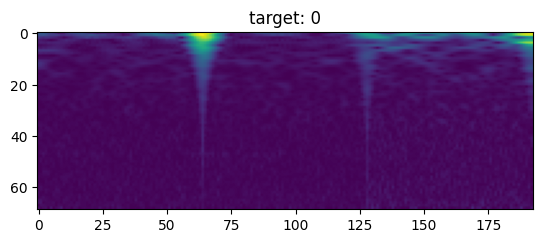

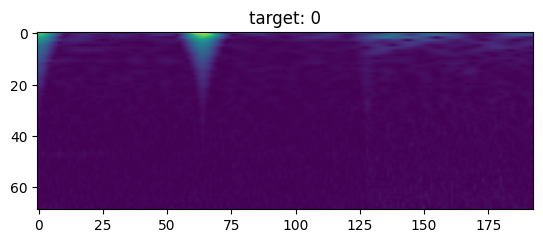

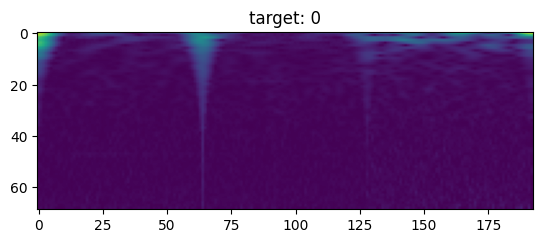

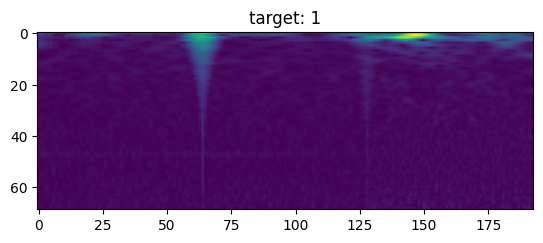

In [ ]:
import torch
from nnAudio.Spectrogram import CQT1992v2

def apply_qtransform(waves, transform=CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=64)):
    waves = np.hstack(waves)
    waves = waves / np.max(waves)
    waves = torch.from_numpy(waves).float()
    image = transform(waves)
    return image

for i in range(5):
    waves = np.load(train.loc[i, 'file_path'])
    image = apply_qtransform(waves)
    target = train.loc[i, 'target']
    plt.imshow(image[0])
    plt.title(f"target: {target}")
    plt.show()

<Axes: >

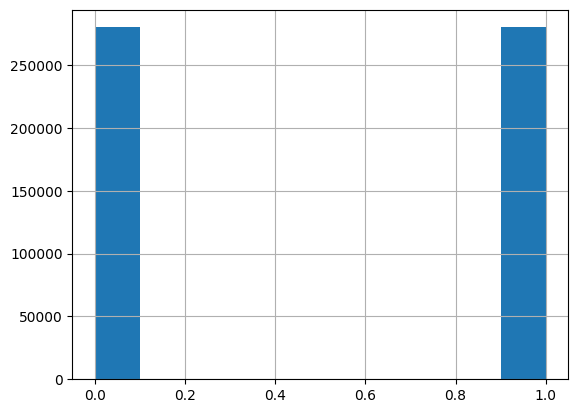

In [ ]:
train['target'].hist()

# Directory settings

In [ ]:

import os

OUTPUT_DIR = './'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# CFG

In [ ]:

class CFG:
    apex=False
    debug=False
    print_freq=100
    num_workers=4
    model_name='tf_efficientnet_b7_ns'
    scheduler='CosineAnnealingLR' # ['ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=3

    T_max=3 # CosineAnnealingLR
    lr=1e-4
    min_lr=1e-6
    batch_size=48
    weight_decay=1e-6
    gradient_accumulation_steps=1
    max_grad_norm=1000
    qtransform_params={"sr": 2048, "fmin": 20, "fmax": 1024, "hop_length": 32, "bins_per_octave": 8}
    seed=42
    target_size=1
    target_col='target'
    n_fold=5
    trn_fold=[0] # [0, 1, 2, 3, 4]
    train=True
    grad_cam=True

if CFG.debug:
    CFG.epochs = 1
    train = train.sample(n=10000, random_state=CFG.seed).reset_index(drop=True)

# Library

In [ ]:

import sys
sys.path.append('../input/pytorch-image-models/pytorch-image-models-master')

import os
import math
import time
import random
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM

import timm

from torch.cuda.amp import autocast, GradScaler

import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import os

wandb_api = os.getenv('WANDB_API')

In [ ]:
from getpass import getpass
wandb_api = getpass('Enter your WandB API key: ')

Enter your WandB API key: ··········


In [ ]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
Aborted!


In [ ]:
import wandb
wandb.login(key=wandb_api)

def class2dict(f):
    return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

run = wandb.init(project="G2Net-Public-experiments",
                 name="exp1",
                 config=class2dict(CFG),
                 group=CFG.model_name,
                 job_type="train")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ahmadreza_nia (ahmadreza__nia). Use `wandb login --relogin` to force relogin


# Utils

In [ ]:

def get_score(y_true, y_pred):
    score = roc_auc_score(y_true, y_pred)
    return score


def init_logger(log_file=OUTPUT_DIR+'train.log'):
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = init_logger()


def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch(seed=CFG.seed)

# CV split

In [ ]:
Fold = StratifiedKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
for n, (train_index, val_index) in enumerate(Fold.split(train, train[CFG.target_col])):
    train.loc[val_index, 'fold'] = int(n)
train['fold'] = train['fold'].astype(int)
display(train.groupby(['fold', 'target']).size())

fold  target
0     0         56014
      1         55986
1     0         56014
      1         55986
2     0         56014
      1         55986
3     0         56014
      1         55986
4     0         56014
      1         55986
dtype: int64

# Dataset

In [ ]:

class TrainDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_names = df['file_path'].values
        self.labels = df[CFG.target_col].values
        self.wave_transform = CQT1992v2(**CFG.qtransform_params)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def apply_qtransform(self, waves, transform):
        waves = np.hstack(waves)
        waves = waves / np.max(waves)
        waves = torch.from_numpy(waves).float()
        image = transform(waves)
        return image

    def __getitem__(self, idx):
        file_path = self.file_names[idx]
        waves = np.load(file_path)
        image = self.apply_qtransform(waves, self.wave_transform)
        image = image.squeeze().numpy()
        if self.transform:
            image = self.transform(image=image)['image']
        label = torch.tensor(self.labels[idx]).float()
        return image, label

In [ ]:
class GradCAMDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.image_ids = df['id'].values
        self.file_names = df['file_path'].values
        self.labels = df[CFG.target_col].values
        self.wave_transform = CQT1992v2(**CFG.qtransform_params)
        self.transform = get_transforms(data='valid')

    def __len__(self):
        return len(self.df)

    def apply_qtransform(self, waves, transform):
        waves = np.hstack(waves)
        waves = waves / np.max(waves)
        waves = torch.from_numpy(waves).float()
        image = transform(waves)
        return image

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        file_path = self.file_names[idx]
        waves = np.load(file_path)
        image = self.apply_qtransform(waves, self.wave_transform)
        image = image.squeeze().numpy()
        vis_image = image.copy()
        if self.transform:
            image = self.transform(image=image)['image']
        label = torch.tensor(self.labels[idx]).float()
        return image_id, image, vis_image, label

# Transforms

In [ ]:

def get_transforms(*, data):

    if data == 'train':
        return A.Compose([
            ToTensorV2(),
        ])

    elif data == 'valid':
        return A.Compose([
            ToTensorV2(),
        ])

CQT kernels created, time used = 0.0089 seconds


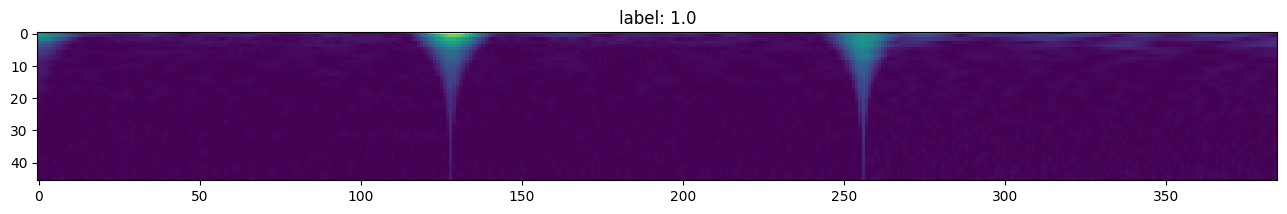

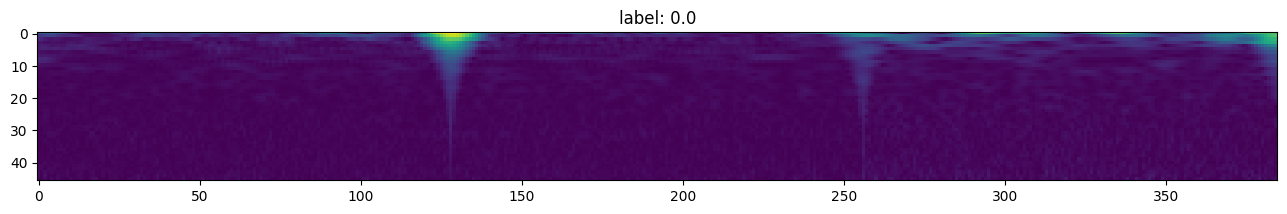

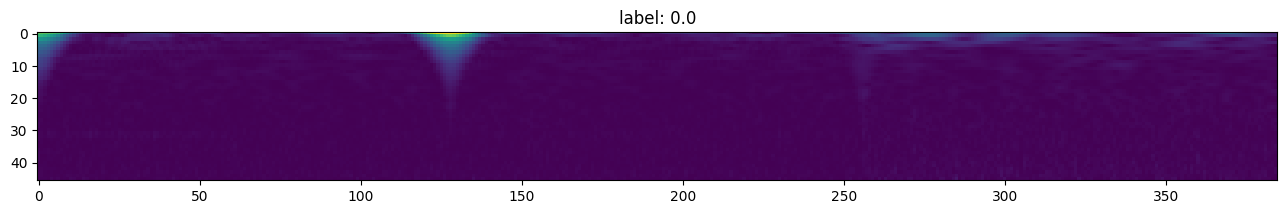

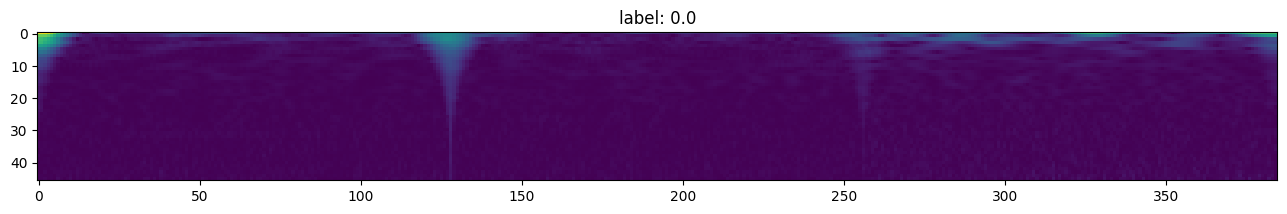

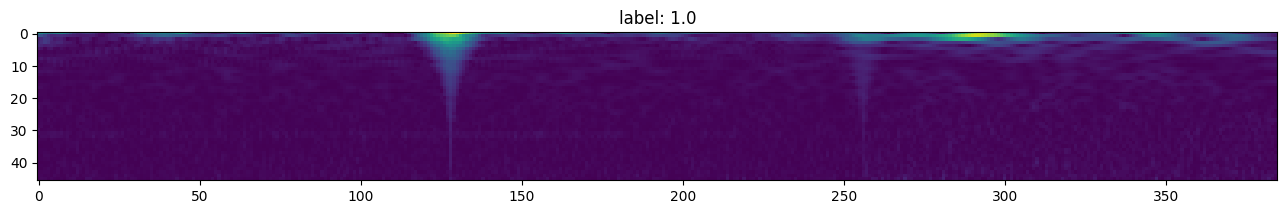

In [ ]:
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))

for i in range(5):
    plt.figure(figsize=(16,12))
    image, label = train_dataset[i]
    plt.imshow(image[0])
    plt.title(f'label: {label}')
    plt.show()

# MODEL

In [ ]:

class CustomModel(nn.Module):
    def __init__(self, cfg, pretrained=False):
        super().__init__()
        self.cfg = cfg
        self.model = timm.create_model(self.cfg.model_name, pretrained=pretrained, in_chans=1)
        self.n_features = self.model.classifier.in_features
        self.model.classifier = nn.Linear(self.n_features, self.cfg.target_size)

    def forward(self, x):
        output = self.model(x)
        return output

# Helper functions

In [ ]:

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))


def train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device):
    if CFG.apex:
        scaler = GradScaler()
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    for step, (images, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        if CFG.apex:
            with autocast():
                y_preds = model(images)
                loss = criterion(y_preds.view(-1), labels)
        else:
            y_preds = model(images)
            loss = criterion(y_preds.view(-1), labels)
        # record loss
        losses.update(loss.item(), batch_size)
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        if CFG.apex:
            scaler.scale(loss).backward()
        else:
            loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            if CFG.apex:
                scaler.step(optimizer)
                scaler.update()
            else:
                optimizer.step()
            optimizer.zero_grad()
            global_step += 1
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  'LR: {lr:.6f}  '
                  .format(epoch+1, step, len(train_loader),
                          remain=timeSince(start, float(step+1)/len(train_loader)),
                          loss=losses,
                          grad_norm=grad_norm,
                          lr=scheduler.get_lr()[0]))
        wandb.log({f"[fold{fold}] loss": losses.val,
                   f"[fold{fold}] lr": scheduler.get_lr()[0]})
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to evaluation modes
    model.eval()
    preds = []
    start = end = time.time()
    for step, (images, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        # compute loss
        with torch.no_grad():
            y_preds = model(images)
        loss = criterion(y_preds.view(-1), labels)
        losses.update(loss.item(), batch_size)
        # record accuracy
        preds.append(y_preds.sigmoid().to('cpu').numpy())
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(step, len(valid_loader),
                          loss=losses,
                          remain=timeSince(start, float(step+1)/len(valid_loader))))
    predictions = np.concatenate(preds)
    return losses.avg, predictions

In [ ]:
def get_grad_cam(model, device, x_tensor, img, label, plot=False):

    result = {"vis": None, "img": None, "prob": None, "label": None}

    # model prob
    with torch.no_grad():
        prob = model(x_tensor.unsqueeze(0).to(device))
    prob = np.concatenate(prob.sigmoid().to('cpu').numpy())[0]

    # grad-cam
    target_layer = model.model.conv_head
    cam = GradCAM(model=model, target_layer=target_layer, use_cuda=True)
    output = cam(input_tensor=x_tensor.unsqueeze(0))
    try:
        vis = show_cam_on_image(x_tensor.numpy().transpose((1, 2, 0)), output[0])
    except:
        return result

    # plot result
    if plot:
        fig, axes = plt.subplots(figsize=(16, 12), ncols=2)
        axes[0].imshow(vis)
        axes[0].set_title(f"prob={prob:.4f}")
        axes[1].imshow(img)
        axes[1].set_title(f"target={label}")
        plt.show()

    result = {"vis": vis, "img": img, "prob": prob, "label": label}

    return result

# Train loop

In [ ]:

def train_loop(folds, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")

    trn_idx = folds[folds['fold'] != fold].index
    val_idx = folds[folds['fold'] == fold].index

    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_col].values

    train_dataset = TrainDataset(train_folds, transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds, transform=get_transforms(data='train'))

    train_loader = DataLoader(train_dataset,
                              batch_size=CFG.batch_size,
                              shuffle=True,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset,
                              batch_size=CFG.batch_size * 2,
                              shuffle=False,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=False)

    # ====================================================
    # scheduler
    # ====================================================
    def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='CosineAnnealingLR':
            scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

    # ====================================================
    # model & optimizer
    # ====================================================
    model = CustomModel(CFG, pretrained=True)
    model.to(device)

    optimizer = Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay, amsgrad=False)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # loop
    # ====================================================
    criterion = nn.BCEWithLogitsLoss()

    best_score = 0.
    best_loss = np.inf

    for epoch in range(CFG.epochs):

        start_time = time.time()

        # train
        avg_loss = train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)

        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        score = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Score: {score:.4f}')
        wandb.log({f"[fold{fold}] epoch": epoch+1,
                   f"[fold{fold}] avg_train_loss": avg_loss,
                   f"[fold{fold}] avg_val_loss": avg_val_loss,
                   f"[fold{fold}] score": score})

        if score > best_score:
            best_score = score
            LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(),
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth')

        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            LOGGER.info(f'Epoch {epoch+1} - Save Best Loss: {best_loss:.4f} Model')
            torch.save({'model': model.state_dict(),
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth')

    valid_folds['preds'] = torch.load(OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth',
                                      map_location=torch.device('cpu'))['preds']

    return valid_folds

In [ ]:

def main():


    def get_result(result_df):
        preds = result_df['preds'].values
        labels = result_df[CFG.target_col].values
        score = get_score(labels, preds)
        LOGGER.info(f'Score: {score:<.4f}')

    if CFG.train:
        # train
        oof_df = pd.DataFrame()
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df = train_loop(train, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                get_result(_oof_df)
        # CV result
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        # save result
        oof_df.to_csv(OUTPUT_DIR+'oof_df.csv', index=False)

    if CFG.grad_cam:
        N = 5
        wandb_table = wandb.Table(columns=["id", "target", "prob", "image", "grad_cam_image"])
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                # load model
                model = CustomModel(CFG, pretrained=False)
                state = torch.load(OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth',
                                   map_location=torch.device('cpu'))['model']
                model.load_state_dict(state)
                model.to(device)
                model.eval()
                # load oof
                oof = pd.read_csv(OUTPUT_DIR+'oof_df.csv')
                oof = oof[oof['fold'] == fold].reset_index(drop=True)
                # grad-cam (oof ascending=False)
                count = 0
                oof = oof.sort_values('preds', ascending=False)
                valid_dataset = GradCAMDataset(oof)
                for i in range(len(valid_dataset)):
                    image_id, x_tensor, img, label = valid_dataset[i]
                    result = get_grad_cam(model, device, x_tensor, img, label, plot=True)
                    if result["vis"] is not None:
                        count += 1
                        wandb_table.add_data(image_id,
                                             result["label"],
                                             result["prob"],
                                             wandb.Image(result["img"]),
                                             wandb.Image(result["vis"]))
                    if count >= N:
                        break
                # grad-cam (oof ascending=True)
                count = 0
                oof = oof.sort_values('preds', ascending=True)
                valid_dataset = GradCAMDataset(oof)
                for i in range(len(valid_dataset)):
                    image_id, x_tensor, img, label = valid_dataset[i]
                    result = get_grad_cam(model, device, x_tensor, img, label, plot=True)
                    if result["vis"] is not None:
                        count += 1
                        wandb_table.add_data(image_id,
                                             result["label"],
                                             result["prob"],
                                             wandb.Image(result["img"]),
                                             wandb.Image(result["vis"]))
                    if count >= N:
                        break
        wandb.log({'grad_cam': wandb_table})

    wandb.finish()

In [ ]:
if __name__ == '__main__':
    main()

========== fold: 0 training ==========
INFO:__main__:========== fold: 0 training ==========


CQT kernels created, time used = 0.0065 seconds
CQT kernels created, time used = 0.0064 seconds


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b7_ns-1dbc32de.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b7_ns-1dbc32de.pth


Epoch: [1][0/9333] Elapsed 0m 3s (remain 475m 31s) Loss: 0.7033(0.7033) Grad: 2.2147  LR: 0.000100  
Epoch: [1][100/9333] Elapsed 0m 43s (remain 65m 52s) Loss: 0.5392(0.6194) Grad: 2.2456  LR: 0.000100  
Epoch: [1][200/9333] Elapsed 1m 24s (remain 63m 41s) Loss: 0.5516(0.5800) Grad: 2.1325  LR: 0.000100  
Epoch: [1][300/9333] Elapsed 2m 5s (remain 62m 34s) Loss: 0.4682(0.5587) Grad: 1.2389  LR: 0.000100  
Epoch: [1][400/9333] Elapsed 2m 46s (remain 61m 45s) Loss: 0.5527(0.5459) Grad: 1.4375  LR: 0.000100  
Epoch: [1][500/9333] Elapsed 3m 27s (remain 61m 0s) Loss: 0.4675(0.5347) Grad: 1.1056  LR: 0.000100  
Epoch: [1][600/9333] Elapsed 4m 9s (remain 60m 19s) Loss: 0.5760(0.5266) Grad: 1.3885  LR: 0.000100  
Epoch: [1][700/9333] Elapsed 4m 50s (remain 59m 38s) Loss: 0.4116(0.5197) Grad: 1.0267  LR: 0.000100  
Epoch: [1][800/9333] Elapsed 5m 32s (remain 58m 59s) Loss: 0.6087(0.5147) Grad: 1.3003  LR: 0.000100  
Epoch: [1][900/9333] Elapsed 6m 13s (remain 58m 19s) Loss: 0.4776(0.5106) Grad

Epoch 1 - avg_train_loss: 0.4551  avg_val_loss: 0.4370  time: 4162s
INFO:__main__:Epoch 1 - avg_train_loss: 0.4551  avg_val_loss: 0.4370  time: 4162s
Epoch 1 - Score: 0.8568
INFO:__main__:Epoch 1 - Score: 0.8568
Epoch 1 - Save Best Score: 0.8568 Model
INFO:__main__:Epoch 1 - Save Best Score: 0.8568 Model


EVAL: [1166/1167] Elapsed 4m 31s (remain 0m 0s) Loss: 0.4033(0.4370) 


Epoch 1 - Save Best Loss: 0.4370 Model
INFO:__main__:Epoch 1 - Save Best Loss: 0.4370 Model


Epoch: [2][0/9333] Elapsed 0m 0s (remain 139m 40s) Loss: 0.3316(0.3316) Grad: 0.5055  LR: 0.000057  
Epoch: [2][100/9333] Elapsed 0m 42s (remain 64m 52s) Loss: 0.4153(0.4343) Grad: 0.3976  LR: 0.000057  
Epoch: [2][200/9333] Elapsed 1m 24s (remain 63m 50s) Loss: 0.3506(0.4378) Grad: 0.4515  LR: 0.000057  
Epoch: [2][300/9333] Elapsed 2m 5s (remain 62m 59s) Loss: 0.3794(0.4360) Grad: 0.3690  LR: 0.000057  
Epoch: [2][400/9333] Elapsed 2m 47s (remain 62m 13s) Loss: 0.4449(0.4355) Grad: 0.5146  LR: 0.000057  
Epoch: [2][500/9333] Elapsed 3m 29s (remain 61m 31s) Loss: 0.2811(0.4342) Grad: 0.5558  LR: 0.000057  
Epoch: [2][600/9333] Elapsed 4m 11s (remain 60m 47s) Loss: 0.4063(0.4352) Grad: 0.3894  LR: 0.000057  
Epoch: [2][700/9333] Elapsed 4m 52s (remain 60m 3s) Loss: 0.4112(0.4345) Grad: 0.5860  LR: 0.000057  
Epoch: [2][800/9333] Elapsed 5m 34s (remain 59m 20s) Loss: 0.3654(0.4327) Grad: 0.5638  LR: 0.000057  
Epoch: [2][900/9333] Elapsed 6m 16s (remain 58m 39s) Loss: 0.3723(0.4325) Gra

Epoch 2 - avg_train_loss: 0.4294  avg_val_loss: 0.4353  time: 4163s
INFO:__main__:Epoch 2 - avg_train_loss: 0.4294  avg_val_loss: 0.4353  time: 4163s
Epoch 2 - Score: 0.8594
INFO:__main__:Epoch 2 - Score: 0.8594
Epoch 2 - Save Best Score: 0.8594 Model
INFO:__main__:Epoch 2 - Save Best Score: 0.8594 Model


EVAL: [1166/1167] Elapsed 4m 31s (remain 0m 0s) Loss: 0.3997(0.4353) 


Epoch 2 - Save Best Loss: 0.4353 Model
INFO:__main__:Epoch 2 - Save Best Loss: 0.4353 Model


Epoch: [3][0/9333] Elapsed 0m 0s (remain 142m 52s) Loss: 0.4275(0.4275) Grad: 0.5112  LR: 0.000009  
Epoch: [3][100/9333] Elapsed 0m 42s (remain 64m 49s) Loss: 0.3750(0.4268) Grad: 0.5167  LR: 0.000009  
Epoch: [3][200/9333] Elapsed 1m 24s (remain 63m 57s) Loss: 0.3882(0.4191) Grad: 0.4946  LR: 0.000009  
Epoch: [3][300/9333] Elapsed 2m 6s (remain 63m 2s) Loss: 0.4302(0.4158) Grad: 0.5311  LR: 0.000009  
Epoch: [3][400/9333] Elapsed 2m 47s (remain 62m 16s) Loss: 0.4030(0.4164) Grad: 0.4653  LR: 0.000009  
Epoch: [3][500/9333] Elapsed 3m 29s (remain 61m 32s) Loss: 0.2816(0.4159) Grad: 0.5010  LR: 0.000009  
Epoch: [3][600/9333] Elapsed 4m 11s (remain 60m 49s) Loss: 0.3641(0.4162) Grad: 0.5441  LR: 0.000009  
Epoch: [3][700/9333] Elapsed 4m 52s (remain 60m 7s) Loss: 0.4535(0.4158) Grad: 0.6857  LR: 0.000009  
Epoch: [3][800/9333] Elapsed 5m 34s (remain 59m 24s) Loss: 0.3189(0.4164) Grad: 0.4658  LR: 0.000009  
Epoch: [3][900/9333] Elapsed 6m 16s (remain 58m 41s) Loss: 0.3904(0.4173) Grad

Epoch 3 - avg_train_loss: 0.4133  avg_val_loss: 0.4277  time: 4161s
INFO:__main__:Epoch 3 - avg_train_loss: 0.4133  avg_val_loss: 0.4277  time: 4161s
Epoch 3 - Score: 0.8614
INFO:__main__:Epoch 3 - Score: 0.8614
Epoch 3 - Save Best Score: 0.8614 Model
INFO:__main__:Epoch 3 - Save Best Score: 0.8614 Model


EVAL: [1166/1167] Elapsed 4m 30s (remain 0m 0s) Loss: 0.3784(0.4277) 


Epoch 3 - Save Best Loss: 0.4277 Model
INFO:__main__:Epoch 3 - Save Best Loss: 0.4277 Model
========== fold: 0 result ==========
INFO:__main__:========== fold: 0 result ==========
Score: 0.8614
INFO:__main__:Score: 0.8614
========== CV ==========
INFO:__main__:========== CV ==========
Score: 0.8614
INFO:__main__:Score: 0.8614


CQT kernels created, time used = 0.0151 seconds


Exception ignored in: <function BaseCAM.__del__ at 0x7860ab88e830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pytorch_grad_cam/base_cam.py", line 196, in __del__
    self.activations_and_grads.release()
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


TypeError: GradCAM.__init__() got an unexpected keyword argument 'target_layer'

The model is trained and the score is  0.8614 which is promising result for this problem. I have purchased the google colab pro for this implementation due to high computation cost and my computation units run out and I could not train again to delete the error appeared in the last box,



<span style="color:red">This is great, but a little more explanation of what you are doing along the way would be helpful. I think you did account for the shift properly when original plotting the data from separate datasets. **[48/50]** -MG</span>.